In [1]:
import os
import time
import numpy as np
import matplotlib.lines as mlines
from matplotlib import pyplot as plt
from matplotlib.ticker import LogFormatter
from scipy.optimize import differential_evolution, NonlinearConstraint

In [2]:
trials = 1
iterations = 100
every_point = 10

In [3]:
CR_trials_ICML = np.load('CR_Trials_ICML.npy', allow_pickle=True)
CR_trials_Cella = np.load('CR_Trials_Cella.npy', allow_pickle=True)

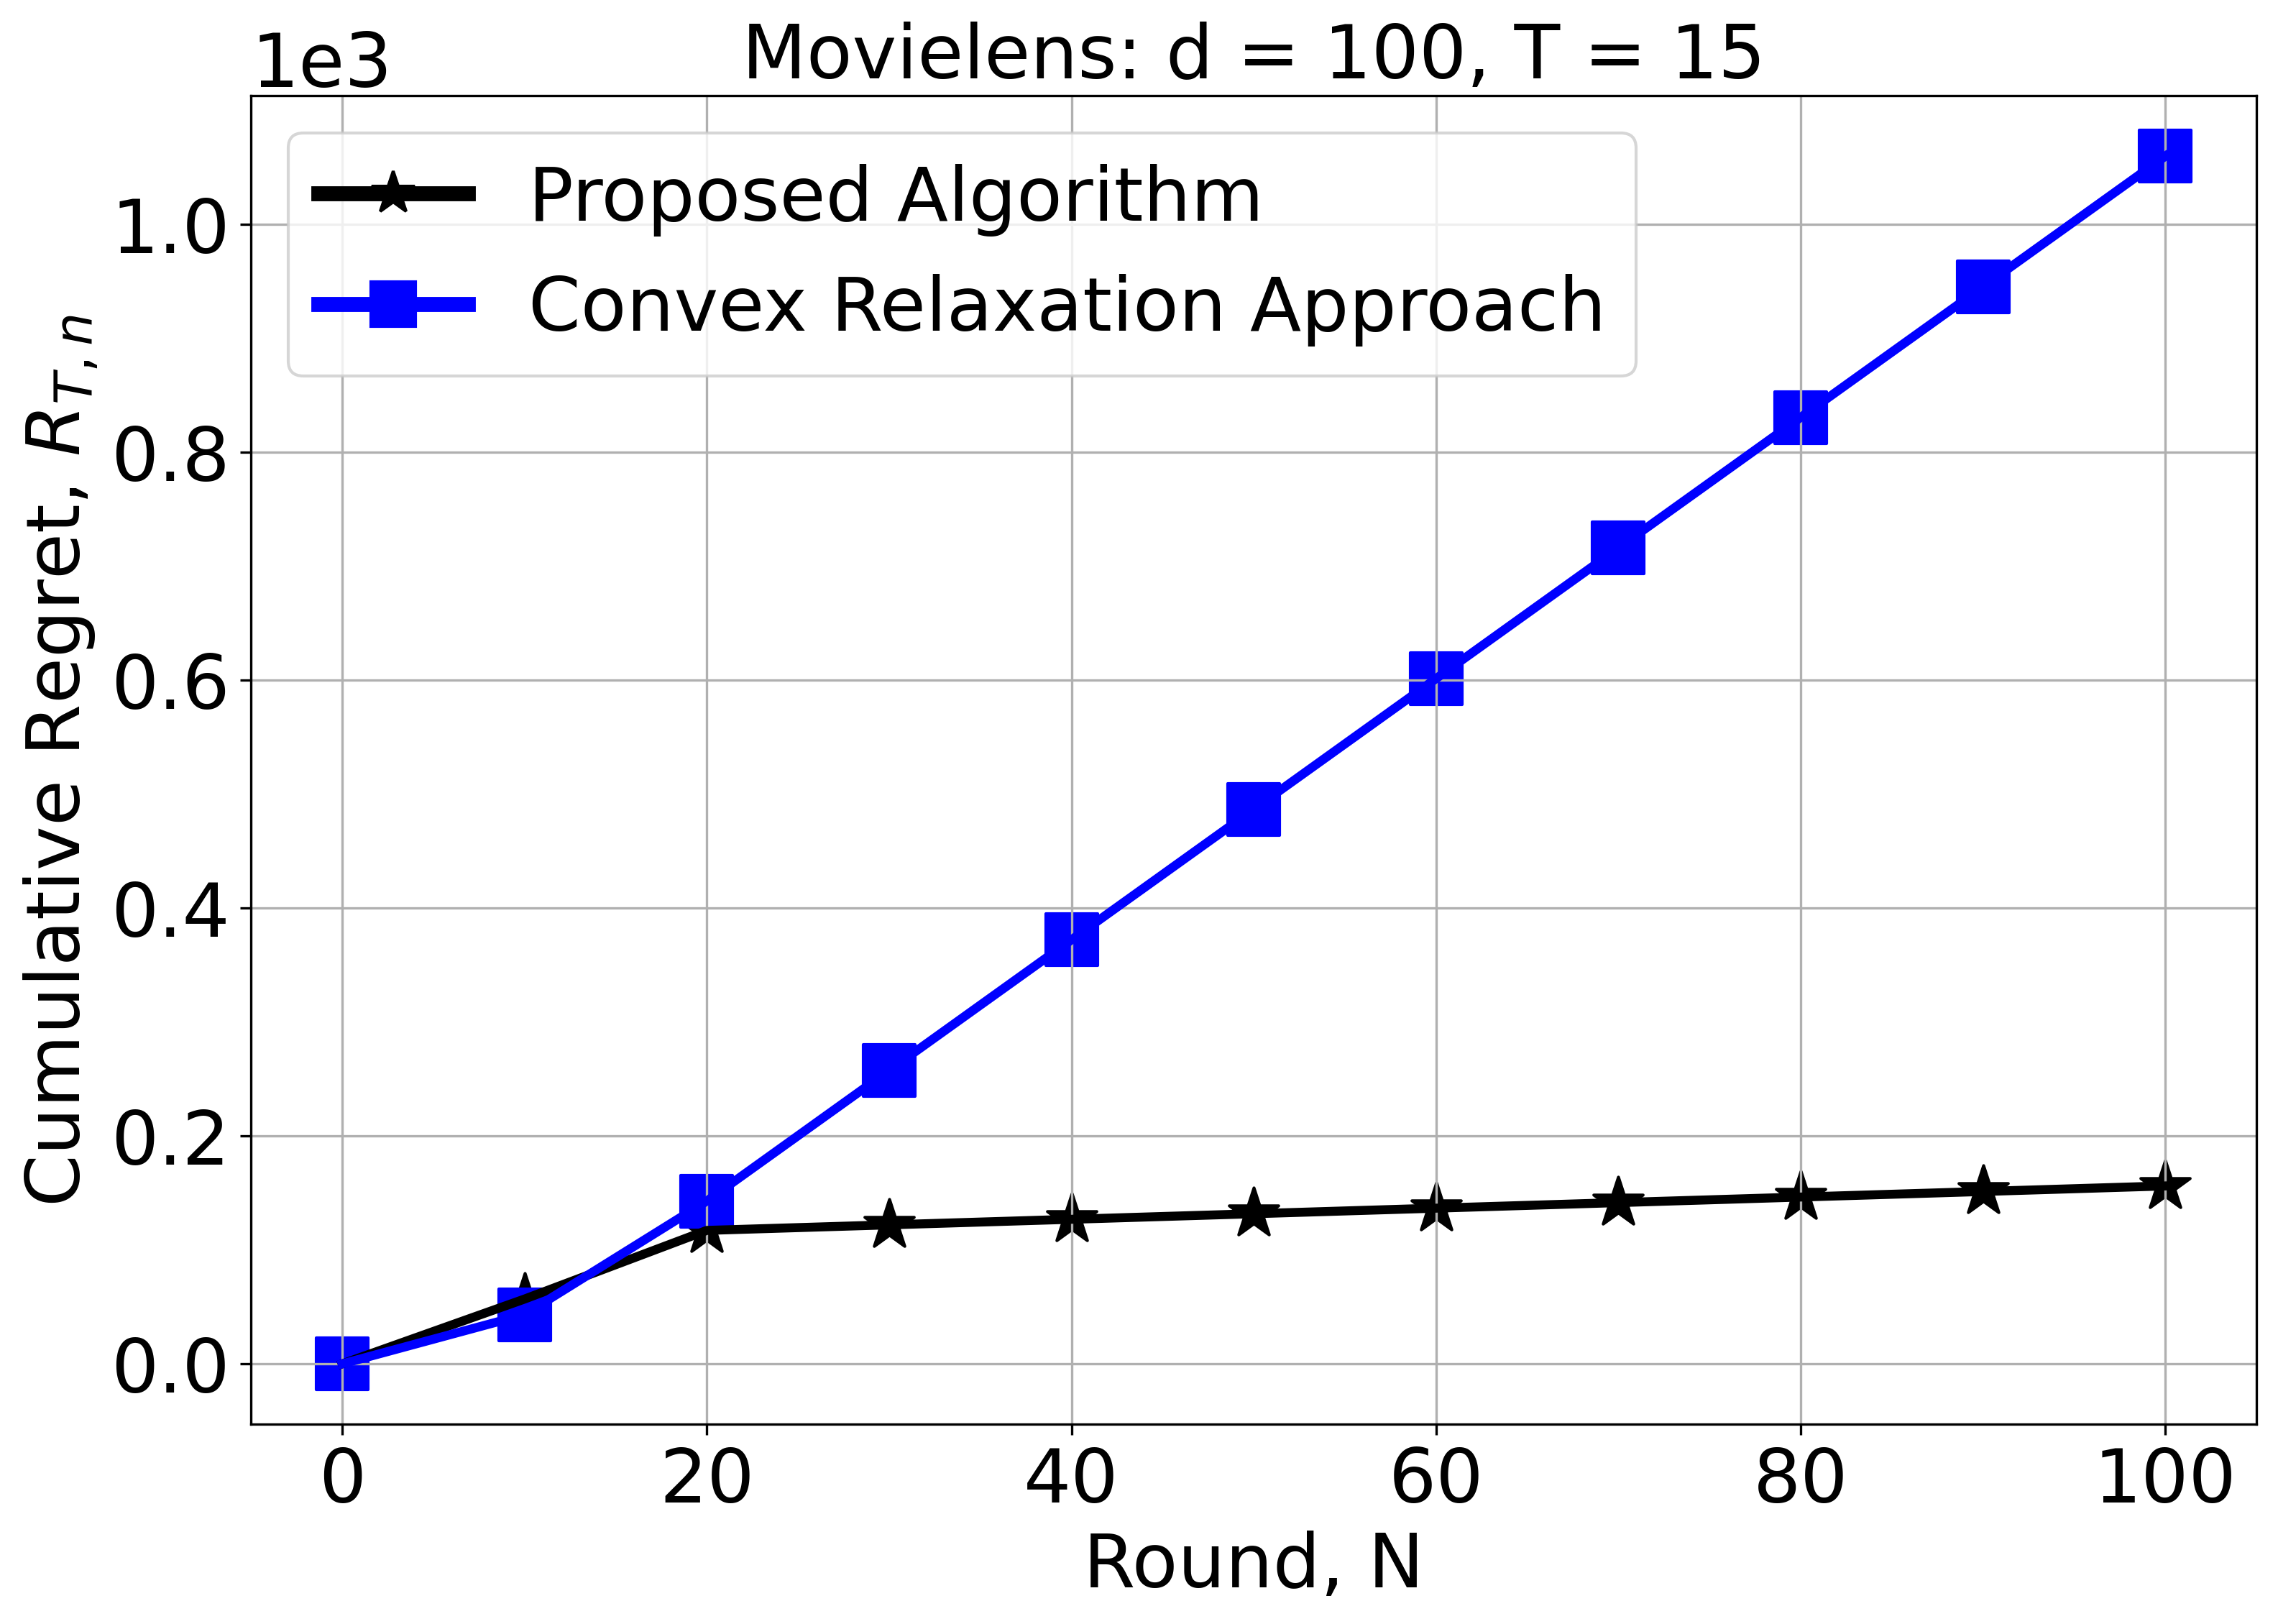

In [4]:
plt.figure(figsize=(12, 8), dpi = 300)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

colors = (['black', 'blue', 'darkgreen', 'purple', 'darkred', 'grey'])
markers = ['*', 's', 'o', 'X', '^', 'P']

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rc('legend', fontsize = 25)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
x = [i for i in range(iterations + 1)]

plt.plot(x[::every_point], CR_trials_ICML[::every_point], color = colors[0], linewidth = 3, label = 'Proposed Algorithm')
plt.scatter(x[::every_point], CR_trials_ICML[::every_point], marker = markers[0], color = colors[0], s = 300, label = 'Proposed Algorithm')
plt.plot(x[::every_point], CR_trials_Cella[::every_point], color = colors[1], linewidth = 3, label = 'Cella et al., 2023')
plt.scatter(x[::every_point], CR_trials_Cella[::every_point], marker = markers[1], color = colors[1], s = 300, label = 'Cella et al., 2023')

legend_elements = [mlines.Line2D([0], [0], color = colors[0], lw = 5, label = 'Proposed Algorithm', marker = markers[0], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[1], lw = 5, label = 'Convex Relaxation Approach', marker = markers[1], markersize = 15)]

plt.grid(True)
plt.xlabel('Round, N', fontsize = 25)
plt.ylabel(r'Cumulative Regret, $R_{T, n}$', fontsize = 25)
plt.legend(handles=legend_elements)
plt.title('Movielens: d = 100, T = 15', fontsize = 25)
plt.savefig('Movielens_cumulative_regret_round.pdf', dpi = 600, bbox_inches = 'tight')
plt.show()
plt.close()